In [3]:
import pandas as pd
df = pd.read_csv('data/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Text(0, 0.5, 'Number of updates')

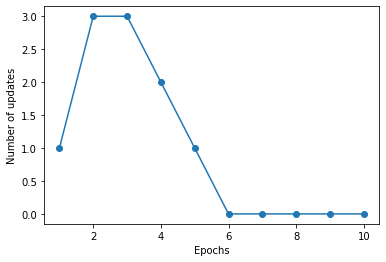

In [5]:
from perceptron import Perceptron

pnn = Perceptron(eta=0.1, n_iter=10)
pnn.fit(X, y)
plt.plot(range(1, len(pnn.errors_) + 1), pnn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

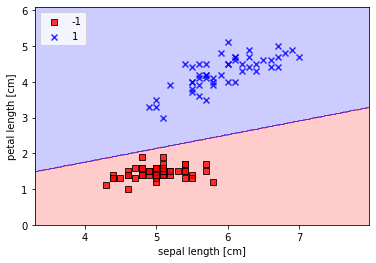

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1], 
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

plot_decision_regions(X, y, classifier=pnn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

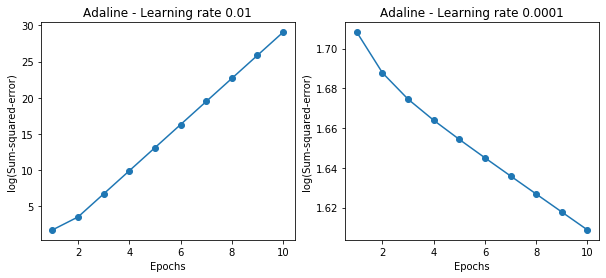

In [7]:
from adaline_gd import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

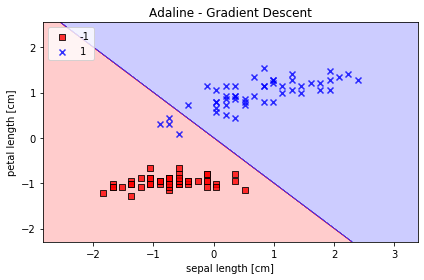

In [8]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter=15, eta=0.1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

Text(0, 0.5, 'Sum-squared-error')

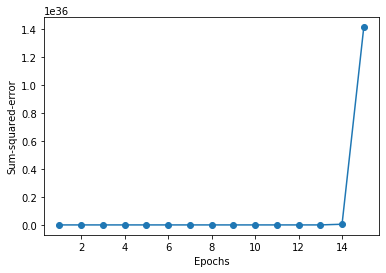

In [9]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

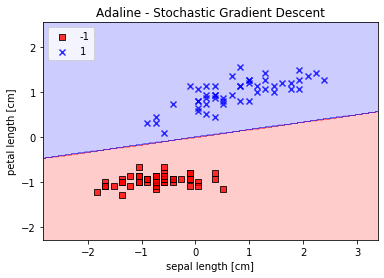

In [10]:
from adaline_sgd import AdalineSGD

ada = AdalineSGD(n_iter=15, eta=0.1, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Text(0, 0.5, 'Average Cost')

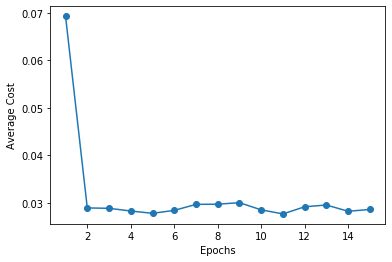

In [11]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

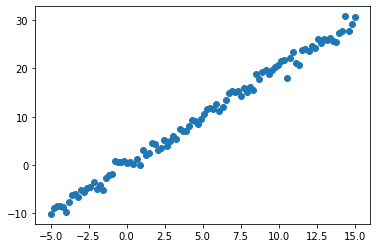

In [12]:
data_linear = np.load('data/linear.npy')
plt.scatter(data_linear[:,0], data_linear[:,1])

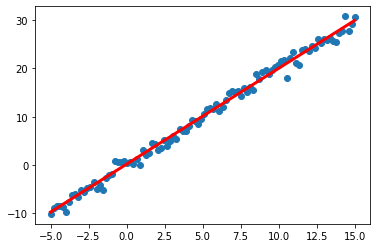

In [13]:
from adaline_gd_regression import AdalineGDRegression

reglin = AdalineGDRegression(n_iter=150, eta=0.00001, random_state=1)
reglin.fit(data_linear[:,0][:,np.newaxis], data_linear[:,1])

plt.scatter(data_linear[:,0], data_linear[:,1])
plt.plot(data_linear[:,0],reglin.predict(data_linear[:,0][:,np.newaxis]), color='red', linewidth=3)

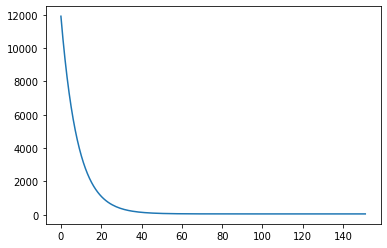

In [14]:
plt.plot(np.linspace(0, len(reglin.cost_) + 1, len(reglin.cost_)), reglin.cost_)

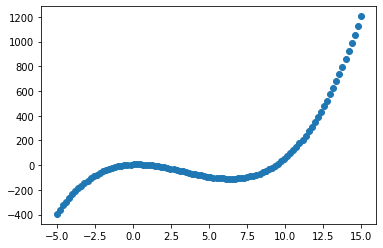

In [58]:
raw_data_nonlinear = np.load('data/nonlinear.npy')
plt.scatter(raw_data_nonlinear[:,0], raw_data_nonlinear[:,1])
data_nonlinear = np.concatenate((raw_data_nonlinear[:,0][:,np.newaxis], raw_data_nonlinear[:,0][:,np.newaxis] ** 2, raw_data_nonlinear[:,0][:,np.newaxis] ** 3, raw_data_nonlinear[:,1][:,np.newaxis]), axis=1)

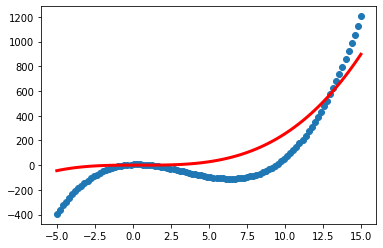

In [59]:
regnonlin = AdalineGDRegression(n_iter=100, eta=0.000000015, random_state=1)
regnonlin.fit(data_nonlinear[:,[0,1,2]], data_nonlinear[:,3])

plt.scatter(data_nonlinear[:,0], data_nonlinear[:,3])
plt.plot(data_nonlinear[:,0],regnonlin.predict(data_nonlinear[:,[0,1,2]]), color='red', linewidth=3)

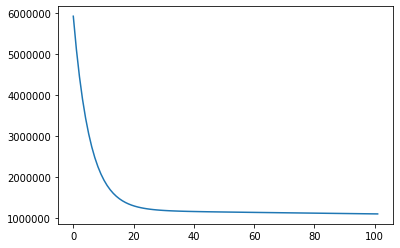

In [60]:
plt.plot(np.linspace(0, len(regnonlin.cost_) + 1, len(regnonlin.cost_)), regnonlin.cost_)

In [61]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
std_data_nonlinear = np.concatenate((sc.fit_transform(data_nonlinear[:,0][:,np.newaxis]), sc.fit_transform(data_nonlinear[:,1][:,np.newaxis]), sc.fit_transform(data_nonlinear[:,2][:,np.newaxis]), sc.fit_transform(data_nonlinear[:,3][:,np.newaxis])), axis=1)

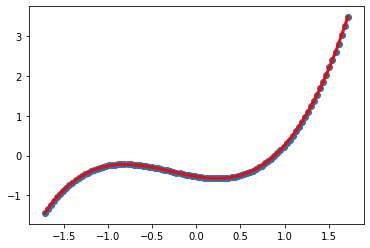

In [62]:
regnonlin = AdalineGDRegression(n_iter=500, eta=0.007, random_state=1)
regnonlin.fit(std_data_nonlinear[:,[0,1,2]], std_data_nonlinear[:,3])

plt.scatter(std_data_nonlinear[:,0], std_data_nonlinear[:,3])
plt.plot(std_data_nonlinear[:,0],regnonlin.predict(std_data_nonlinear[:,[0,1,2]]), color='red', linewidth=3)

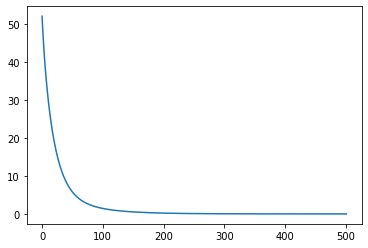

In [63]:
plt.plot(np.linspace(0, len(regnonlin.cost_) + 1, len(regnonlin.cost_)), regnonlin.cost_)

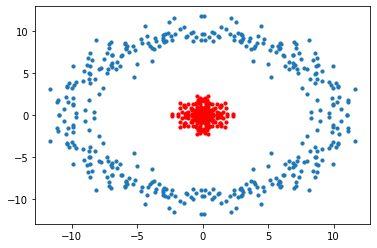

In [294]:
cX, cy = np.load('data/circle_features.npy'), np.where(np.load('data/circle_targets.npy') > 0.5, 1, -1)
plt.scatter(cX[cy == 1, 0], cX[cy == 1, 1], s=10)
plt.scatter(cX[cy == -1, 0], cX[cy == -1, 1], s=10, color='red')

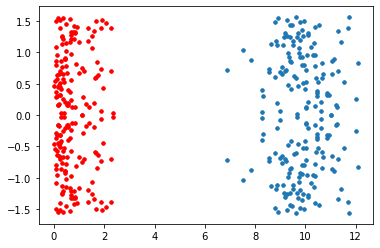

In [295]:
r = np.linalg.norm(cX, axis=1).reshape(-1, 1)
a = np.arctan(cX[:,1] / cX[:,0]).reshape(-1, 1)
plt.scatter(r[cy == 1], a[cy == 1], s=10)
plt.scatter(r[cy == -1], a[cy == -1], s=10, color='red')

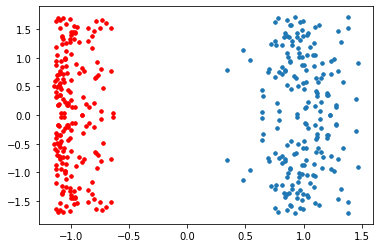

In [296]:
std_cX = np.concatenate((sc.fit_transform(r), sc.fit_transform(a)), axis=1)
plt.scatter(std_cX[cy == 1, 0], std_cX[cy == 1, 1], s=10)
plt.scatter(std_cX[cy == -1, 0], std_cX[cy == -1, 1], s=10, color='red')

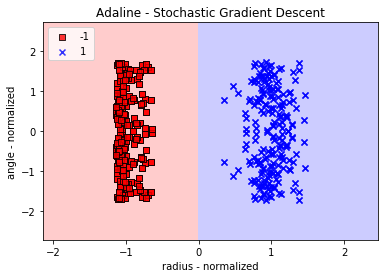

In [306]:
c_classifier = AdalineGD(n_iter=5, eta=0.001, random_state=1).fit(std_cX, cy)

plot_decision_regions(std_cX, cy, classifier=c_classifier)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('radius - normalized')
plt.ylabel('angle - normalized')
plt.legend(loc='upper left')

Text(0, 0.5, 'Sum-squared-error')

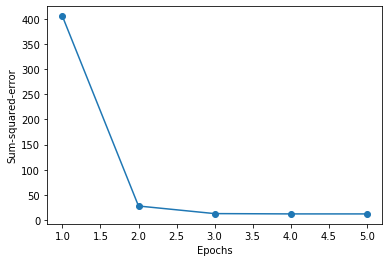

In [307]:
plt.plot(range(1, len(c_classifier.cost_) + 1), c_classifier.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')